In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2.8.2


In [21]:
# Get the Data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-06-18 22:18:34--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-06-18 22:18:34 (25.3 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [22]:
# Load in the data
data = pd.read_csv("moore.csv", header=None).values

X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

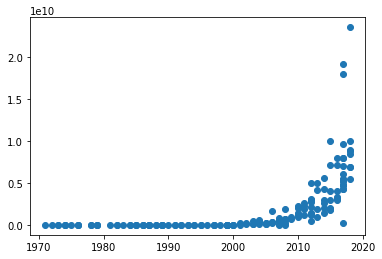

In [23]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

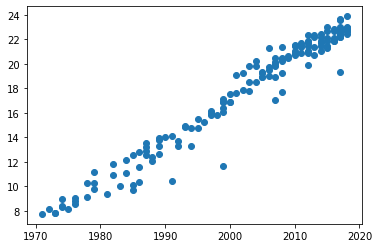

In [24]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [25]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [26]:
# Create our tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer=tf.optimizers.SGD(0.001, 0.9), 
    loss="mse"
)

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=100, callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 436.3884 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 371.1359 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 236.8206 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 217.7896 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 156.8579 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 121.3964 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 93.9638 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 68.6991 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 54.6999 - lr: 0.0010
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 47.4603 - lr: 0.0010
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 3

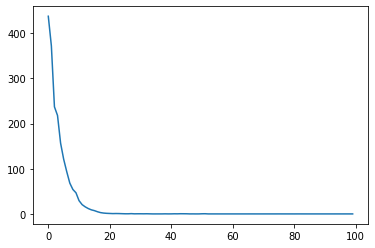

In [27]:
# Plot what's returned by model.fit
plt.plot(r.history["loss"], label="loss")

In [28]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "input" layer doesn't cound
print(model.layers[0].get_weights())

[array([[0.34454095]], dtype=float32), array([17.756762], dtype=float32)]


In [29]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [30]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0117991003528113


In [31]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


## Making Preditions

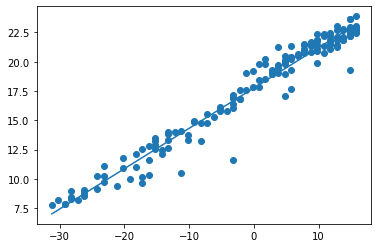

In [32]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [33]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True